In [108]:
#I plot data from Shen and Bentz (soon)
import ROOT
from ROOT import *
from array import array
import math
from IPython.display import Image
from IPython.display import display

# Setting what to be shown in statistics box:
gStyle.SetOptStat(1110)   # Print for stat: Entries, Mean, and RMS
gStyle.SetOptFit(1111)    # Print for fit:  Everything!

gStyle.SetStatX(0.52);    # Top left corner.
gStyle.SetStatY(0.86);

#---------------------------------------------------------------------------------
### Constants ###
        
c         = 299792458. #m/s
H0        = 2.23 *10.**(-18) # s^-1      = 69 (km/s)/Mpc
dH0       = 0.03 *10.**(-18) # s^-1      = 1 (km/s)/Mpc
L_sol     = 3.828*10**(26) # W

In [109]:
#----------------------------------------------------------------------
# Read data
#----------------------------------------------------------------------
### Bentz 13 part I ###
#name    z    D_L   dD   A_B

#f_lambda(5100*(1+z))

name_B=[]
z_B             = array("f", [])
D_B             = array("f", [])
dD_B            = array("f", [])
A_B_B           = array("f", [])

with open( 'Bentz13zDA.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_B.append((line[0]))
        
        z_B.append(float(line[1]))
        
        D_B.append(float(line[2])*3.0857*10**22) #Mpc -> m
        dD_B.append(float(line[3])*3.0857*10**22)
        
        A_B_B.append(float(line[4]))
#---------------------------------------------------------------------------------
### Bentz 13 part II ###
#name/a    tau  +dtau   -dtau    F  dF    L   dL
# a=same name

#f_lambda(5100*(1+z))

#10^44 ergs s^-1

name_B2      = []
tau_B2       = array("f", [])
dtaup_B2     = array("f", [])
dtaum_B2     = array("f", [])
F_B2         = array("f", [])
dF_B2        = array("f", [])
L_B2         = array("f", [])
dL_B2        = array("f", [])

with open( 'Bentz13tauFL.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_B2.append((line[0]))
        
        tau_B2.append(float(line[1])*24*60*60) #days -> s
        dtaup_B2.append(float(line[2])*24*60*60)
        dtaum_B2.append(float(line[3])*24*60*60)
        
        F_B2.append(float(line[4])*10**(-8)) #10^-15 ergs s^-1 cm^-2 AA^-1 = 10^-15 *10^7 kg s^-3 m^-1
        dF_B2.append(float(line[5])*10**(-8))
        
        L_B2.append(float(line[6])*10**(37)/L_sol) #10^44 ergs s^-1 ->  10^44 * 10^-7 kg m^2 s^-3       
        dL_B2.append(float(line[7])*10**(37)/L_sol)
        
        #Should be wrong
        #L_B2.append((10**(float(line[6])))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        #dL_B2.append((10**(float(line[7])))*10**(-7)/L_sol)
#---------------------------------------------------------------------------------
### Shen ###
#name    z    tau    dtau+    dtau-   F    dF    L    dL
# a=same name

#f_lambda(5100*(1+z))


name_S    = []
z_S       = array("f", [])
tau_S     = array("f", [])
dtaup_S   = array("f", [])
dtaum_S   = array("f", [])
F_S       = array("f", [])
dF_S      = array("f", [])
L_S       = array("f", [])
dL_S      = array("f", [])

with open( 'ShenSDSSztauFL.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_S.append((line[0]))
        
        z_S.append(float(line[1]))
        
        tau_S.append(float(line[2])*24*60*60)  #days -> s
        dtaup_S.append(float(line[3])*24*60*60) 
        dtaum_S.append(float(line[4])*24*60*60) 
        
        F_S.append(float(line[5])*10**(-10)) #10^-17 erg s^-1 cm^-2 AA^-1 =10^-17 *10^7 kg s^-3 m^-1 -> kg s^-3 m^-1
        dF_S.append(float(line[6])*10**(-10))
        
        #print float(line[7])
        
        #L_S.append(math.exp(float(line[7]))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=10^y
        #dL_S.append(math.exp(float(line[8]))*10**(-7)/L_sol)
        
        #L_S.append((10**(float(line[7])))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        #dL_S.append((10**(float(line[8])))*10**(-7)/L_sol)
        
        #Should be wrong:
        L_S.append(float(line[7])*10**(37)/L_sol) #10^44 ergs s^-1 ->  10^44 * 10^-7 kg m^2 s^-3       
        dL_S.append(float(line[8])*10**(37)/L_sol)

In [110]:
#--------------------------------------------------------------------------------
# Combining data
#--------------------------------------------------------------------------------
# PG1226+023 = PG1226+032 ???
# I renamed it 23

#z for each tau
z_B2 = array('f',[])
for i,x in enumerate(name_B2):
    i_name=name_B.index(x) #find index of name_B2 in name_B
    z_B2.append(z_B[i_name]) #use z for that index
    
print z_B2

#Shen + Bentz 2013
z  = z_S + z_B2 #Still an array

F  = F_S + F_B2
dF = dF_S + dF_B2

L  = L_S + L_B2
dL = dL_S + dL_B2

tau = tau_S + tau_B2
dtaum = dtaum_S + dtaum_B2
dtaup = dtaup_S + dtaup_B2

"""

NobsPerName=[name_B2.count(x) for x in name_B] #noget galt
print NobsPerName

z_B2=[]
for i in range(len(name_B)): 
    for j in range(NobsPerName[i]):
        z_B2.append(z_B[i])
print z_B2 
"""

array('f', [0.025790000334382057, 0.025790000334382057, 0.025790000334382057, 0.1420000046491623, 0.1550000011920929, 0.04701999947428703, 0.02638999931514263, 0.02638999931514263, 0.02638999931514263, 0.02638999931514263, 0.03300999850034714, 0.03300999850034714, 0.032710000872612, 0.032710000872612, 0.022190000861883163, 0.022190000861883163, 0.022190000861883163, 0.10000000149011612, 0.03528999909758568, 0.03528999909758568, 0.03528999909758568, 0.23409999907016754, 0.003860000055283308, 0.04493999853730202, 0.008840000256896019, 0.027869999408721924, 0.021090000867843628, 0.009730000048875809, 0.01955999992787838, 0.0023399998899549246, 0.0033199999015778303, 0.02102000080049038, 0.012930000200867653, 0.15834000706672668, 0.06300999969244003, 0.008999999612569809, 0.014630000106990337, 0.1550000011920929, 0.03044999949634075, 0.08959999680519104, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017

'\n\nNobsPerName=[name_B2.count(x) for x in name_B] #noget galt\nprint NobsPerName\n\nz_B2=[]\nfor i in range(len(name_B)): \n    for j in range(NobsPerName[i]):\n        z_B2.append(z_B[i])\nprint z_B2 \n'

In [111]:
#----------------------------------------------------------------------
# Analyse data
#----------------------------------------------------------------------
### tauF vs. z ###
    
# tauF vs. z
tauF          = array('f', [tau[i]/math.sqrt(F[i]) for i,x in enumerate(F)]) #F/sqrt(tau)

#Slightly wrong uncertainties:
dtaumean      = array('f', [(dtaum[i]+dtaup[i])/2. for i,x in enumerate(tau)]) #Mean of errors of each side
dtauF         = array('f', [math.sqrt(1./F[i] * dtaumean[i]**2 + (tau[i] * F[i]**(-3./2.) /2. )**2 * dF[i]**2) for i,x in enumerate(tau)] )
dz            = array('f', [0.001]*len(z)) #That order of magnitude

#print "tauF:", tauF, "+-",dtauF
#print "z:", z, "+-",dz

#print "tau:", tau[0], "+-",dtaumean[0]

In [112]:
#-------------------------------------------------------------------------------------
### L vs. R ###
RBLR      = array("f", [x*c for x in tau])       #R=c*tau

dRBLR     = array("f", [x*c for x in dtaumean])  # dR=c*dtau

print "RBLR:", RBLR, "+-",dRBLR
print "L:", L, "+-",dL


RBLR: array('f', [950605916930048.0, 603518201233408.0, 836636812247040.0, 481778460524544.0, 567255322591232.0, 766701255786496.0, 753750184558592.0, 880670293360640.0, 367809355841536.0, 365219155017728.0, 650141883170816.0, 556894485741568.0, 497319699021824.0, 445515581882368.0, 282332560883712.0, 435154745032704.0, 323775841173504.0, 370399590219776.0, 2875129491095552.0, 2326005842706432.0, 450695983529984.0, 536172812042240.0, 362628954193920.0, 756340385382400.0, 745979582087168.0, 986868795572224.0, 670863556870144.0, 1219987473694720.0, 960966720225280.0, 233118611013632.0, 417023305711616.0, 414433104887808.0, 3805013801435136.0, 629420276580352.0, 528402209570816.0, 862538887593984.0, 3887900496232448.0, 97132757385216.0, 70971666989056.0, 302536154152960.0, 59833776603136.0, 103349252784128.0, 264201104785408.0, 94801571610624.0, 48436866973696.0, 170435610148864.0, 79001309675520.0, 159556743200768.0, 7946754649489408.0, 979098193100800.0, 96614718898176.0, 14375648126566

In [113]:
#----------------------------------------------------------------------
# Plot data
#----------------------------------------------------------------------
# tauFz
print "laengder:",len(tau), len(z), len(dz), len(dtauF)
Graph_tauFz = TGraphErrors(len(tau), z, tauF, dz, dtauF)

canvas = TCanvas("canvas","All data", 50, 50, 600, 400)


fit = TF1("fit", "[0]+[1]*x" , 0, 0.8)
fit.SetParameters(10.**9,10.**11)#10000., 0.1)
fit.SetNpx(500) #good resolution
Graph_tauFz.Fit("fit", "R")

Graph_tauFz.GetXaxis().SetTitle("z")
Graph_tauFz.GetYaxis().SetTitle("tau/sqrt(F) [s^2.5*kg^-1/2]")
Graph_tauFz.SetTitle("")

Graph_tauFz.GetYaxis().SetTitleOffset(1.25)
Graph_tauFz.SetLineColor(kBlack)
Graph_tauFz.SetMarkerSize(0.5)
Graph_tauFz.SetMarkerStyle(20)


Graph_tauFz.Draw('AP')
fit.Draw("same")
#canvas.Update()
canvas.Draw()
canvas.SaveAs("tauFz.png")

#---------------------------------------------------------------------------------
# R vs. L

logRBLR  = array('f',[math.log(x) for x in RBLR])
logdRBLR = array('f',[math.log(x) for x in dRBLR])
logL     = array('f',[math.log(x) for x in L])
logdL    = array('f',[math.log(x) for x in dL])

#Graph_RL = TGraphErrors(len(L), L, RBLR, dL, dRBLR)
Graph_RL = TGraphErrors(len(L), L, logRBLR, dL, logdRBLR)

canvas2 = TCanvas("canvas2","", 50, 50, 600, 400)

#fitRL = TF1("fitRL", "[0]+[1]*exp(x)" , -10., 10.**(13))
fitRL = TF1("fitRL", "[0]+[1]*x" , -10., 10.**(13))
#fitRL = TF1("fitRL", "[0]+10.**13*x" , 0., 1.2*10**27)
#fitRL.SetParameter(0,10)
fitRL.SetParameters(-15, 10.**(-11))#10.**(12), 10.**(-13))
fitRL.SetNpx(500) #good resolution
Graph_RL.Fit("fitRL", "R")

Graph_RL.GetXaxis().SetTitle("L/L_sol")
Graph_RL.GetYaxis().SetTitle("R_BLR [m]")
Graph_RL.SetTitle("")

Graph_RL.SetLineColor(kBlack)
Graph_RL.SetMarkerSize(0.5)
Graph_RL.SetMarkerStyle(20)

fitRL.Draw("same")
Graph_RL.Draw('AP')
canvas2.Update()
canvas2.SaveAs("RL.png")


laengder: 86 

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas2


86 86 86


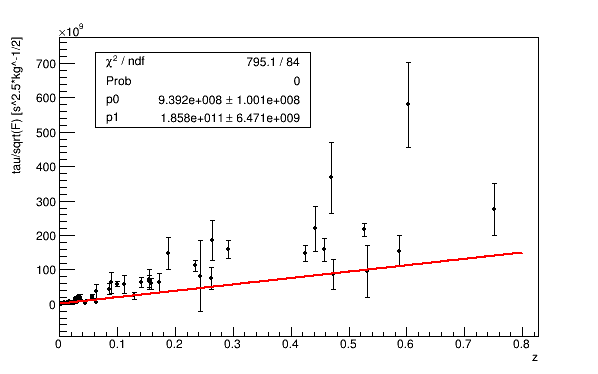

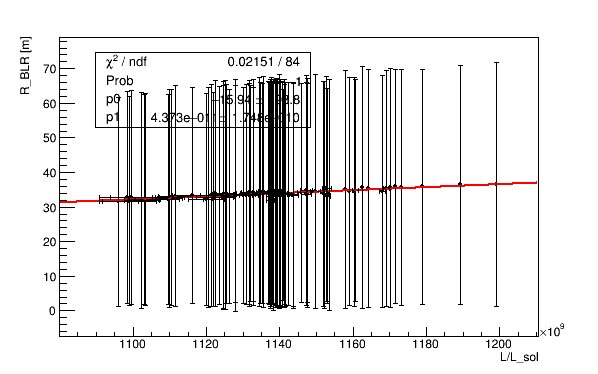

In [114]:
#Show plots

x = Image("tauFz.png") 
y = Image("RL.png") 
display(x,y)